In [ ]:
import pandas as pd

In [ ]:
!pip install xlrd==1.2.0

# **a. il catalogo complessivo dei prodotti. Visualizzare il nome del prodotto, il nome della marca e la categoria**

In [ ]:
brands = pd.read_excel("https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true", sheet_name="brands")
brands

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [ ]:
categories = pd.read_excel("https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true", sheet_name="categories")
categories

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


In [ ]:
products = pd.read_excel("https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true", sheet_name="products")
products

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016.0,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016.0,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016.0,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99


In [ ]:
products_brand = pd.merge(products, brands, how="outer", on="brand_id")
products_brand_categories = pd.merge(products_brand, categories, how="outer", on="category_id")[["product_name", "brand_name", "category_name"]]
products_brand_categories

,product_name,brand_name,category_name
0,Trek 820 - 2016,Trek,Mountain Bikes
1,Trek Fuel EX 8 29 - 2016,Trek,Mountain Bikes
2,Trek Slash 8 27.5 - 2016,Trek,Mountain Bikes
3,Trek Remedy 29 Carbon Frameset - 2016,Trek,Mountain Bikes
4,Trek X-Caliber 8 - 2017,Trek,Mountain Bikes
...,...,...,...
316,Sun Bicycles Cruz 7 - 2017,Sun Bicycles,Comfort Bicycles
317,Sun Bicycles Cruz 3 - Women's - 2017,Sun Bicycles,Comfort Bicycles
318,Sun Bicycles Cruz 7 - Women's - 2017,Sun Bicycles,Comfort Bicycles
319,Sun Bicycles Drifter 7 - 2017,Sun Bicycles,Comfort Bicycles


# **b. il numero di prodotti per ogni categoria. Visualizzare i nomi delle categorie e il numero dei prodotti**

In [ ]:
cate_groupby = products_brand_categories.groupby("category_name", as_index = False)["product_name"].count()
cate_groupby

,category_name,product_name
0,Children Bicycles,59
1,Comfort Bicycles,30
2,Cruisers Bicycles,78
3,Cyclocross Bicycles,10
4,Electric Bikes,24
5,Mountain Bikes,60
6,Road Bikes,60


***GRAFICO :***

In [ ]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


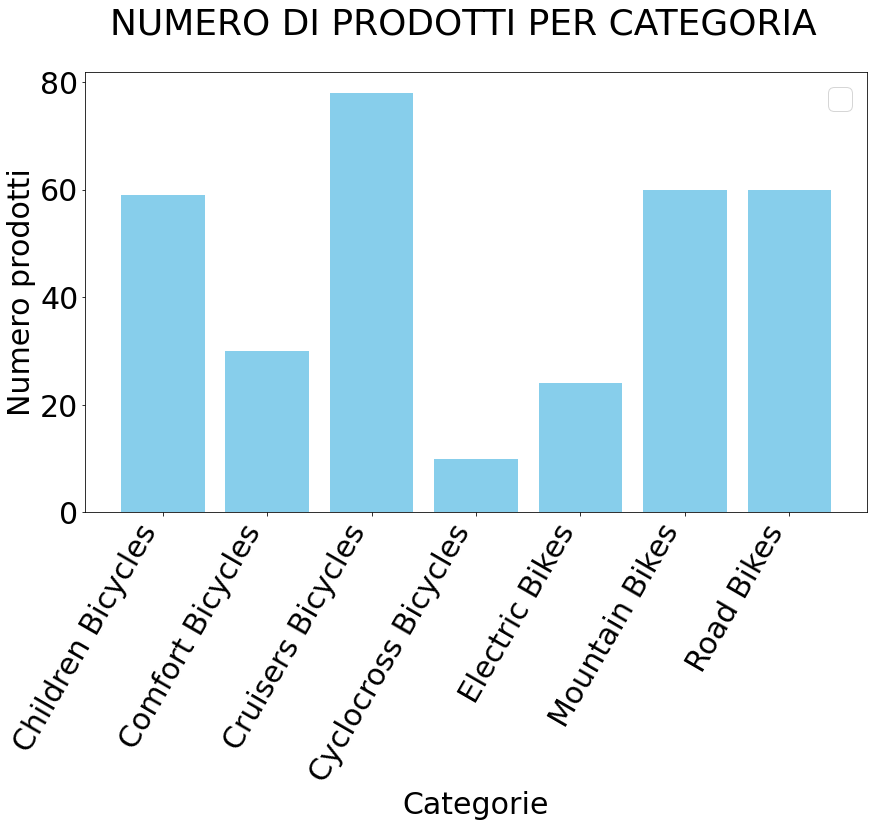

In [ ]:
#  ingrandisce tutto di 50% visto che il default del size di tutto è 10
plt.rcParams.update({"font.size" : 30})

#  crea la figura
fig = plt.figure(figsize=(11,8))

#grandezza del grafico
fig.set_size_inches(14,9)

#  crea gli assi
ax = plt.axes()

#  crea le barre
#  color = "chocolate" per cambiare il colore delle barre
#  dentro le virgolette mettere nome di un colore dalla tabella di cssdegli colori
ax.bar(cate_groupby["category_name"], cate_groupby["product_name"], color="skyblue")

#  ruota i label o i nomi dell'asse x
fig.autofmt_xdate(rotation=60) 

#  crea un titolo nell'asse x
ax.set_xlabel("Categorie")

#  crea un titolo nell'asse y
ax.set_ylabel("Numero prodotti")

#  crea un titolo
fig.suptitle("NUMERO DI PRODOTTI PER CATEGORIA")

#   per mettere la legenda delle colonne o barre
ax.legend(loc=0)

plt.show()

# **c. il numero di prodotti per ogni marca (brand). Visualizzare i nomi dei brand e il numero di prodotti**

In [ ]:
brand_groupby = products_brand_categories.groupby("brand_name", as_index = False)["product_name"].count().sort_values(by ="product_name",ascending = False)
brand_groupby

,brand_name,product_name
8,Trek,135
0,Electra,118
7,Surly,25
6,Sun Bicycles,23
1,Haro,10
2,Heller,3
3,Pure Cycles,3
5,Strider,3
4,Ritchey,1


***Grafico :***

No handles with labels found to put in legend.


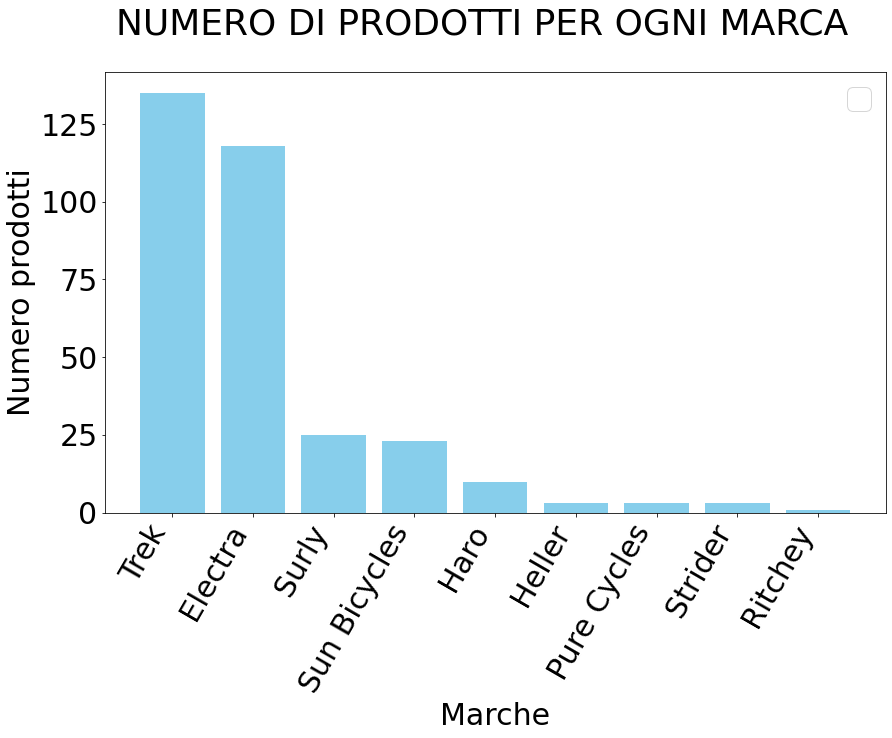

In [ ]:
#  ingrandisce tutto di 50% visto che il default del size di tutto è 10
plt.rcParams.update({"font.size" : 30})

#  crea la figura
fig = plt.figure(figsize=(11,8))

#grandezza del grafico
fig.set_size_inches(14,9)

#  crea gli assi
ax = plt.axes()

#  crea le barre
#  color = "chocolate" per cambiare il colore delle barre
#  dentro le virgolette mettere nome di un colore dalla tabella di cssdegli colori
ax.bar(brand_groupby["brand_name"], brand_groupby["product_name"], color="skyblue")

#  ruota i label o i nomi dell'asse x
fig.autofmt_xdate(rotation=60) 

#  crea un titolo nell'asse x
ax.set_xlabel("Marche")

#  crea un titolo nell'asse y
ax.set_ylabel("Numero prodotti")

#  crea un titolo
fig.suptitle("NUMERO DI PRODOTTI PER OGNI MARCA")

#   per mettere la legenda delle colonne o barre
ax.legend(loc=0)

plt.show()

# **d. Visualizzare i nomi dei prodotti della marca Trek**

In [ ]:
products_brand_categories[products_brand_categories.brand_name.str.contains("Trek")]["product_name"]

0                                 Trek 820 - 2016
1                        Trek Fuel EX 8 29 - 2016
2                        Trek Slash 8 27.5 - 2016
3           Trek Remedy 29 Carbon Frameset - 2016
4                         Trek X-Caliber 8 - 2017
                          ...                    
172    Trek Precaliber 24 (7-Speed) - Boys - 2018
173      Trek Precaliber 24 21-speed Boy's - 2018
174     Trek Precaliber 24 21-speed Girl's - 2018
175      Trek Precaliber 24 7-speed Girl's - 2018
176                  Trek Superfly 24 - 2017/2018
Name: product_name, Length: 135, dtype: object

In [ ]:
###      OPPURE

products_brand_categories[products_brand_categories.brand_name == "Trek"]["product_name"]

0                                 Trek 820 - 2016
1                        Trek Fuel EX 8 29 - 2016
2                        Trek Slash 8 27.5 - 2016
3           Trek Remedy 29 Carbon Frameset - 2016
4                         Trek X-Caliber 8 - 2017
                          ...                    
172    Trek Precaliber 24 (7-Speed) - Boys - 2018
173      Trek Precaliber 24 21-speed Boy's - 2018
174     Trek Precaliber 24 21-speed Girl's - 2018
175      Trek Precaliber 24 7-speed Girl's - 2018
176                  Trek Superfly 24 - 2017/2018
Name: product_name, Length: 135, dtype: object

# **e. Visualizzare i prodotti delle categorie che hanno la parola 'Bikes' nel nome**

In [ ]:
products_brand_categories[products_brand_categories.product_name.str.contains("Trek")]["product_name"]

0                                 Trek 820 - 2016
1                        Trek Fuel EX 8 29 - 2016
2                        Trek Slash 8 27.5 - 2016
3           Trek Remedy 29 Carbon Frameset - 2016
4                         Trek X-Caliber 8 - 2017
                          ...                    
172    Trek Precaliber 24 (7-Speed) - Boys - 2018
173      Trek Precaliber 24 21-speed Boy's - 2018
174     Trek Precaliber 24 21-speed Girl's - 2018
175      Trek Precaliber 24 7-speed Girl's - 2018
176                  Trek Superfly 24 - 2017/2018
Name: product_name, Length: 135, dtype: object

# **f. Visualizzare la categoria che ha il prodotto che costa di più**

In [ ]:
cate_products = pd.merge(categories, products, how = "outer", on="category_id")
cate_products

,category_id,category_name,product_id,product_name,brand_id,model_year,list_price
0,1,Children Bicycles,21,Electra Cruiser 1 (24-Inch) - 2016,1,2016.0,269.99
1,1,Children Bicycles,22,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,1,2016.0,269.99
2,1,Children Bicycles,23,Electra Girl's Hawaii 1 (20-inch) - 2015/2016,1,2016.0,299.99
3,1,Children Bicycles,83,Trek Boy's Kickster - 2015/2017,9,2017.0,149.99
4,1,Children Bicycles,84,Sun Bicycles Lil Kitt'n - 2017,7,2017.0,109.99
...,...,...,...,...,...,...,...
316,7,Road Bikes,317,Trek Checkpoint ALR 5 - 2019,9,2019.0,1999.99
317,7,Road Bikes,318,Trek Checkpoint ALR 5 Women's - 2019,9,2019.0,1999.99
318,7,Road Bikes,319,Trek Checkpoint SL 5 Women's - 2019,9,2019.0,2799.99
319,7,Road Bikes,320,Trek Checkpoint SL 6 - 2019,9,2019.0,3799.99


In [ ]:
cate_products[cate_products.list_price == cate_products.list_price.max()]["category_name"]

285    Road Bikes
Name: category_name, dtype: object

# **g. Visualizzare i brand con almeno 100 prodotti. Viaulizzare il nome del brand e il numero di prodotti**

In [ ]:
groupby_count_prod = products_brand_categories.groupby("brand_name", as_index = False)["product_name"].count()
groupby_count_prod[groupby_count_prod.product_name >= 100]


,brand_name,product_name
0,Electra,118
8,Trek,135


***Grafico :***

In [ ]:
#   Fare il grafico
groupby_count_prod2 = groupby_count_prod[groupby_count_prod.product_name >= 100]
groupby_count_prod2

,brand_name,product_name
0,Electra,118
8,Trek,135


No handles with labels found to put in legend.


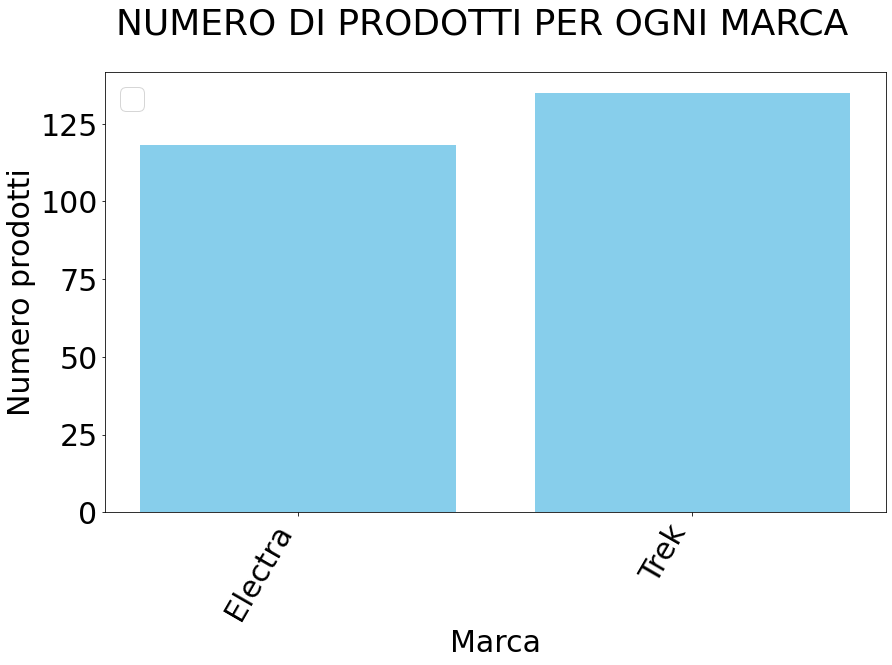

In [ ]:
#  ingrandisce tutto di 50% visto che il default del size di tutto è 10
plt.rcParams.update({"font.size" : 30})

#  crea la figura
fig = plt.figure(figsize=(11,8))

#grandezza del grafico
fig.set_size_inches(14,9)

#  crea gli assi
ax = plt.axes()

#  crea le barre
#  color = "chocolate" per cambiare il colore delle barre
#  dentro le virgolette mettere nome di un colore dalla tabella di cssdegli colori
ax.bar(groupby_count_prod2["brand_name"], groupby_count_prod2["product_name"], color="skyblue")

#  ruota i label o i nomi dell'asse x
fig.autofmt_xdate(rotation=60) 

#  crea un titolo nell'asse x
ax.set_xlabel("Marca")

#  crea un titolo nell'asse y
ax.set_ylabel("Numero prodotti")

#  crea un titolo
fig.suptitle("NUMERO DI PRODOTTI PER OGNI MARCA")

#   per mettere la legenda delle colonne o barre
ax.legend(loc=0)

plt.show()

# **h. Visualizzare la marca del prodotto 'Electra Townie Original 21D - 2016'**

In [ ]:
products_brand_categories[products_brand_categories.product_name.str.contains("Electra Townie Original 21D - 2016")]["brand_name"]

213    Electra
291    Electra
Name: brand_name, dtype: object

# **i. Visualizzare il numero di prodotti per ogni anno. Visualizzare l'anno e il numero di prodotti**

In [ ]:
year_prods = cate_products.groupby("model_year", as_index = False)["product_name"].count()
year_prods

,model_year,product_name
0,2016.0,25
1,2017.0,85
2,2018.0,195
3,2019.0,6


***Grafico :***

No handles with labels found to put in legend.


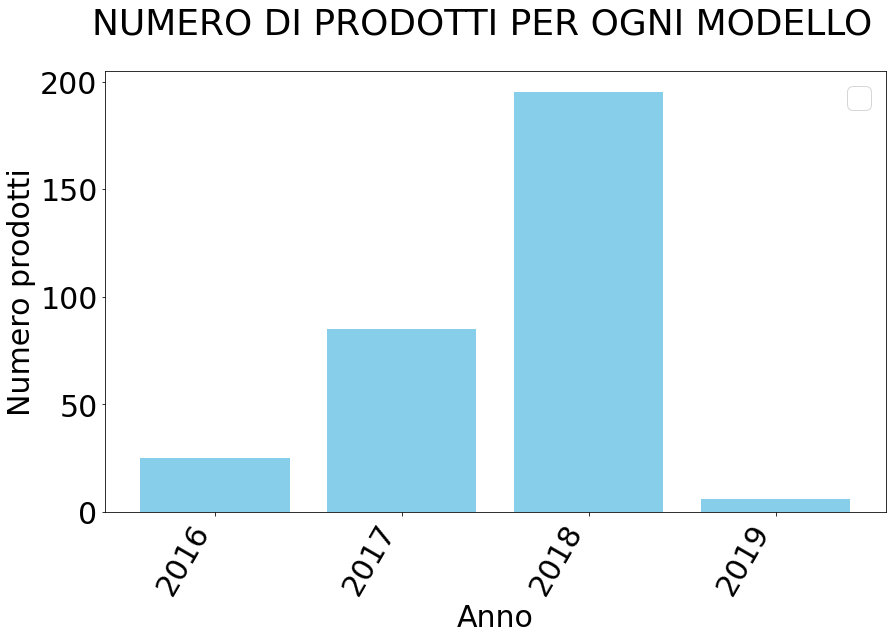

In [ ]:
#  ingrandisce tutto di 50% visto che il default del size di tutto è 10
plt.rcParams.update({"font.size" : 30})

#  crea la figura
fig = plt.figure(figsize=(11,8))

#grandezza del grafico
fig.set_size_inches(14,9)

#  crea gli assi
ax = plt.axes()

#  crea le barre
#  color = "chocolate" per cambiare il colore delle barre
#  dentro le virgolette mettere nome di un colore dalla tabella di cssdegli colori
ax.bar(year_prods["model_year"], year_prods["product_name"], color="skyblue")

#  ruota i label o i nomi dell'asse x
fig.autofmt_xdate(rotation=60) 

#  crea un titolo nell'asse x
ax.set_xlabel("Anno")

#  crea un titolo nell'asse y
ax.set_ylabel("Numero prodotti")

#  crea un titolo
fig.suptitle("NUMERO DI PRODOTTI PER OGNI MODELLO")

#   per mettere la legenda delle colonne o barre
ax.legend(loc=0)

plt.show()